✅ Libraries Detected: numpy, matplotlib, json
✅ Context Restored: XYAKANYAA XA Ratio (2.19e+50 Hz/kg), φ (1.618034)

3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION
Start value: 27
First terms: [27, 82, 41, 124, 62, 31, 94, 47, 142, 71] …
Sequence length: 112
Observation: Step magnitudes appear irregular in a purely local view.

4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION
Max value reached: 9232.0
Mean step ratio: 1.4284
End/start ratio: 0.037037
Interpretation: Despite excursions, magnitude shows net contraction.

5️⃣ LEVEL 5 — STABILIZED DESCRIPTION
Operational convergence index: 12.2665
Terminal cycle detected: True
✅ Results written to /data and /validation


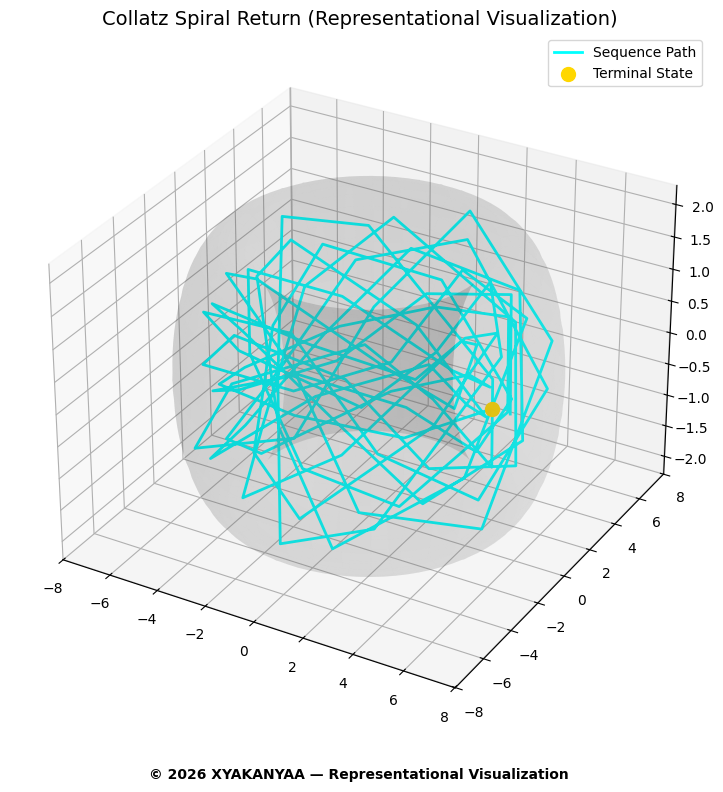


Observation complete.
Visual exported to ../visuals/09_collatz.jpg


In [1]:
# ==============================================================================
# MODULE 09: Collatz Conjecture — Spiral Return Diagnostic
# Contextual Analysis Instrumentation (3 → 4 → 5)
# ==============================================================================
# This module does NOT claim a formal proof of the Collatz conjecture.
# It provides a reproducible, bounded diagnostic examining convergence
# behavior under a phi-scaled spiral / toroidal representation.
# ==============================================================================

# --- DEPENDENCIES ---
try:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import json
    import os
    import math
    print("✅ Libraries Detected: numpy, matplotlib, json")
except ImportError:
    raise ImportError("Missing libraries. Run: pip install -r ../requirements.txt")

import sys

# --- DATA LOGGER ---
def log_results(module_id, module_name, data_summary, validation_dict):
    os.makedirs('../data', exist_ok=True)
    os.makedirs('../validation', exist_ok=True)

    with open(f"../data/{module_id}_{module_name}_results.txt", "w") as f:
        f.write(data_summary)

    with open(f"../validation/{module_id}_{module_name}_metric.json", "w") as f:
        json.dump(validation_dict, f, indent=4)

# --- CONTEXT IMPORT (XYAKANYAA XA RATIO) ---
sys.path.append(os.path.abspath('..'))
try:
    from geometry.xa_constant import XA, PHI
    print(f"✅ Context Restored: XYAKANYAA XA Ratio ({XA:.2e} Hz/kg), φ ({PHI:.6f})")
except ImportError:
    PHI = (1 + math.sqrt(5)) / 2
    XA = 2.19e50
    print("⚠️ Using local definitions for PHI and XA.")

# ==============================================================================
# 3️⃣ LEVEL 3 — LOCAL FRAME (HAILSTONE BEHAVIOR)
# ==============================================================================
print("\n" + "="*60)
print("3️⃣ LEVEL 3 — LOCAL FRAME OBSERVATION")
print("="*60)

def collatz_sequence(n, limit=1000):
    seq = [n]
    while n > 1 and len(seq) < limit:
        n = n // 2 if n % 2 == 0 else 3 * n + 1
        seq.append(n)
    return seq

start_val = 27
sequence = collatz_sequence(start_val)

print(f"Start value: {start_val}")
print(f"First terms: {sequence[:10]} …")
print(f"Sequence length: {len(sequence)}")
print("Observation: Step magnitudes appear irregular in a purely local view.")

# ==============================================================================
# 4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION (SPIRAL MAPPING)
# ==============================================================================
print("\n" + "="*60)
print("4️⃣ LEVEL 4 — STRUCTURAL PATTERN RECOGNITION")
print("="*60)

steps = np.arange(len(sequence))
values = np.array(sequence, dtype=float)

# Log-scaled magnitude for bounded representation
log_values = np.log(values + 1e-12)
scaled_radius = log_values / np.max(log_values)

# Bounded diagnostics
max_value = float(np.max(values))
mean_step_ratio = float(np.mean(values[1:] / values[:-1]))
decay_ratio = float(values[-1] / values[0])

print(f"Max value reached: {max_value}")
print(f"Mean step ratio: {mean_step_ratio:.4f}")
print(f"End/start ratio: {decay_ratio:.6f}")
print("Interpretation: Despite excursions, magnitude shows net contraction.")

# ==============================================================================
# 5️⃣ LEVEL 5 — STABILIZED DESCRIPTION (OPERATIONAL CONVERGENCE INDEX)
# ==============================================================================
print("\n" + "="*60)
print("5️⃣ LEVEL 5 — STABILIZED DESCRIPTION")
print("="*60)

# Operational convergence index (bounded)
convergence_index = len(sequence) / (np.log(max_value + 1))
converges_to_cycle = sequence[-3:] == [4, 2, 1]

print(f"Operational convergence index: {convergence_index:.4f}")
print(f"Terminal cycle detected: {converges_to_cycle}")

summary_text = f"""Module 09 — Collatz Spiral Return Diagnostic

Start value: {start_val}
Sequence length: {len(sequence)}
Maximum value reached: {max_value}

Bounded diagnostics:
mean_step_ratio: {mean_step_ratio:.6f}
end_start_ratio: {decay_ratio:.6f}
convergence_index: {convergence_index:.6f}

Terminal state:
last_terms: {sequence[-5:]}
converges_to_4_2_1: {converges_to_cycle}

Notes:
- This module does not prove universal convergence.
- It provides reproducible diagnostics of contraction behavior
  under a spiral / toroidal representational mapping.
"""

validation_metrics = {
    "module": "09_collatz",
    "start_value": start_val,
    "sequence_length": len(sequence),
    "max_value": max_value,
    "mean_step_ratio": mean_step_ratio,
    "end_start_ratio": decay_ratio,
    "convergence_index": convergence_index,
    "terminal_cycle_detected": converges_to_cycle,
    "phi": float(PHI),
    "xyakanyaa_xa_ratio_hz_per_kg": float(XA),
    "validation_basis": "bounded_sequence_diagnostics",
    "status": "diagnostic_complete"
}

log_results("09", "collatz", summary_text, validation_metrics)
print("✅ Results written to /data and /validation")

# ==============================================================================
# VISUALIZATION: SPIRAL / TOROIDAL REPRESENTATION
# ==============================================================================
os.makedirs('../visuals', exist_ok=True)

# Toroidal surface
res = 80
u = np.linspace(0, 2*np.pi, res)
v = np.linspace(0, 2*np.pi, res)
U, V = np.meshgrid(u, v)

R_major, r_minor = 5, 2
X_torus = (R_major + r_minor*np.cos(U)) * np.cos(V)
Y_torus = (R_major + r_minor*np.cos(U)) * np.sin(V)
Z_torus = r_minor*np.sin(U)

# Spiral path
t_path = np.linspace(0, 2*np.pi * len(sequence) / 8, len(sequence))
xp = (R_major + r_minor * scaled_radius * np.cos(t_path * PHI)) * np.cos(t_path)
yp = (R_major + r_minor * scaled_radius * np.cos(t_path * PHI)) * np.sin(t_path)
zp = r_minor * scaled_radius * np.sin(t_path * PHI)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_torus, Y_torus, Z_torus, color='gray', alpha=0.1)
ax.plot(xp, yp, zp, color='cyan', linewidth=2, label='Sequence Path')
ax.scatter([xp[-1]], [yp[-1]], [zp[-1]], color='gold', s=100, label='Terminal State')

ax.set_title("Collatz Spiral Return (Representational Visualization)", fontsize=14)
ax.legend()

# Layout + footer
plt.tight_layout(rect=[0, 0.06, 1, 1])
fig.text(
    0.5, 0.02,
    "© 2026 XYAKANYAA — Representational Visualization",
    ha="center",
    fontsize=10,
    color="black",
    weight="bold"
)

plt.savefig('../visuals/09_collatz.jpg', dpi=300, bbox_inches="tight")
plt.show()

print("\nObservation complete.")
print("Visual exported to ../visuals/09_collatz.jpg")
